## Classification of the iris dataset using support vector machining in python

Given a data set of iris flower of 3 different varieties, classify to appropriate group

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


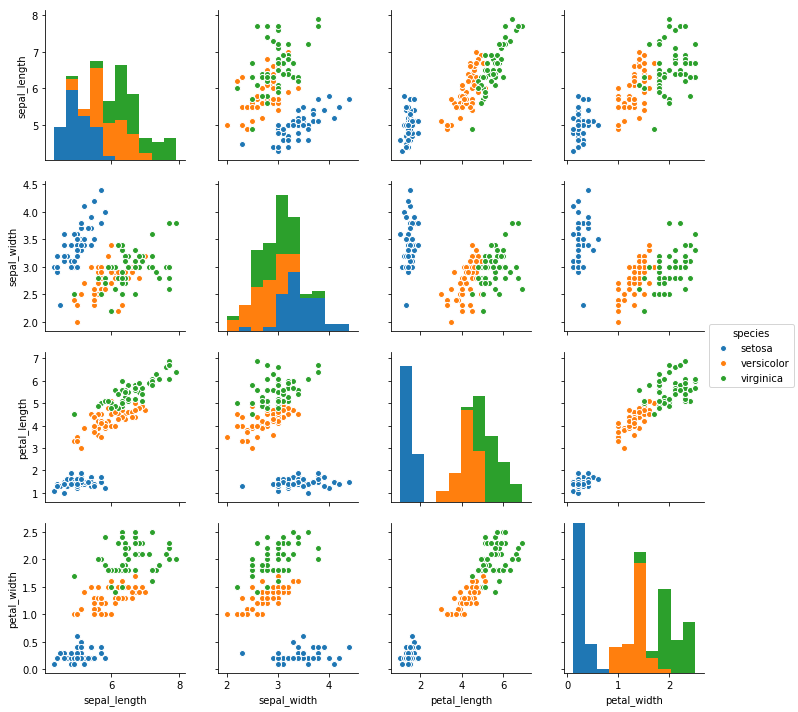

In [4]:
sns.pairplot(iris,hue='species')

### Most separable species of flower seems to the setosa species

In [5]:
setosa=iris[iris['species']=='setosa']

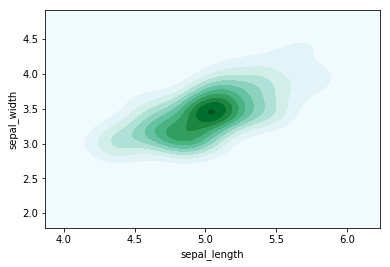

In [6]:
sns.kdeplot(setosa['sepal_length'],setosa['sepal_width'],shade=True)

## Split data to train and test set

In [7]:
from sklearn.model_selection import train_test_split

In [14]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Train the data for SVM

In [15]:
from sklearn.svm import SVC
Svm=SVC()

In [17]:
Svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model evaluation

In [18]:
predictions=Svm.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0 15  0]
 [ 0  2 15]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.88      1.00      0.94        15
  virginica       1.00      0.88      0.94        17

avg / total       0.96      0.96      0.96        45



### accuracy looks pretty good. Model is able to easily identify Setosa easily. Small missclassification of virginica as versicolor occcurs. Can be observed from scatter plots that these two species of iris have pretty similar features.

## Grid search to improve model parameters

In [21]:
from sklearn.grid_search import GridSearchCV

In [23]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [31]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.944444 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.942857 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=1.000000 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.888889 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.771429 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.823529 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [33]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [34]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
predictions1=grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predictions1))
print('\n')
print(classification_report(y_test,predictions1))

[[13  0  0]
 [ 0 15  0]
 [ 0  3 14]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.83      1.00      0.91        15
  virginica       1.00      0.82      0.90        17

avg / total       0.94      0.93      0.93        45



##  Slight decline in model performance seen with grid search. This could be due selection of parameters in grid search